## Statistical Experiments and Significance Testing 

1. Form a hypothesis 
2. Design experiment 
3. Collect data 
4. Inference or Conclusion


### A/B Testing 

A/B testing, also known as split testing, is a method of experimentation used in marketing, product development, and other fields to compare two versions of a product or process and determine which one performs better. The "A" and "B" refer to the two different versions being tested. 

Note:
- **Treatment**: subject exposed to experiment - price, news headlines.
- **Treatment group**: a group of subjects exposed to a certain treatments. 
- **Control group**: a group of subjects exposed to no treatments. 
- **Randomization**: randomly assigning subject to treatments.
- **Subject**: participants 
- **Test statistics**: Measurement of the treatment.


### Hypothesis Testing | Significance Testing 

Hypothesis testing is a statistical method used to make inferences about population parameters based on a sample of data. The process involves formulating a hypothesis (a statement about the population parameter) and using sample data to assess whether there is enough evidence to reject or not reject the hypothesis. The primary purpose is to understand whether random chance might be responsible for an observed effect. 


Notes:
- **Null hypothesis ($H_o$)**:  Represents a default or status quo assumption. It often states that there is no effect or no difference. Blame chance
- **Alternate hypothesis ($H_1$ or $H_a$)**: Represents the opposite of the null hypothesis. It states that there is an effect or a difference. Counterpoint to the null (what you hope to prove).
- **One-way test**: A one-way test, also known as a one-tailed test, is a type of statistical hypothesis test where the rejection region is located entirely on one side of the probability distribution. In other words, it assesses the evidence for a specific direction of an effect or difference.

  1. **One-Way Test for Means:**
     - **Left-Tailed Test:** The null hypothesis ($H_0$) assumes no effect or a specific condition (e.g., no increase or a decrease in the mean).
       - $H_0: \mu \leq \mu_0$ or $H_0: \mu = \mu_0$
     - The alternative hypothesis ($H_1$ or $H_a$) states a directional effect (e.g., a decrease in the mean).
       - $H_1: \mu > \mu_0$

     - **Right-Tailed Test:** The null hypothesis assumes no effect or a specific condition (e.g., no decrease or an increase in the mean).
       - $H_0: \mu \geq \mu_0$ or $H_0: \mu = \mu_0$
     - The alternative hypothesis states a directional effect (e.g., an increase in the mean).
       - $H_1: \mu < \mu_0$

  2. **One-Way Test for Proportions:**
     - Similar to one-way tests for means, one-way tests for proportions can be left-tailed or right-tailed.
     - The null hypothesis ($H_0$) assumes no effect or a specific condition (e.g., no increase or a decrease in the proportion).
     - The alternative hypothesis ($H_1$ or $H_a$) states a directional effect (e.g., a decrease or an increase in the proportion).

  The choice between a one-tailed or two-tailed test depends on the research question and the specific hypothesis being tested. One-tailed tests are often used when there is a specific expectation or prediction about the direction of the effect. However, researchers should carefully consider the choice of the test based on the nature of the study and the available evidence.
- **Two-way test**: A two-way test, also known as a two-tailed test, is a type of statistical hypothesis test where the rejection region is divided between both tails of the probability distribution. It is used to assess evidence for the existence of an effect in either direction, without specifying the expected direction of the effect.

  Here are the key components of a two-way test:

  1. **Two-Way Test for Means:**
    - **Two-Tailed Test:** The null hypothesis ($H_0$) assumes no effect or a specific condition (e.g., no difference in the means).
      - $H_0: \mu_1 = \mu_2$ or $H_0: \mu_1 - \mu_2 = 0$
    - The alternative hypothesis ($H_1$ or $H_a$) states that there is a significant difference, without specifying the direction.
      - $H_1: \mu_1 \neq \mu_2$ or $H_1: \mu_1 - \mu_2 \neq 0$

  2. **Two-Way Test for Proportions:**
    - Similar to two-way tests for means, two-way tests for proportions can be two-tailed.
    - The null hypothesis ($H_0$) assumes no effect or a specific condition (e.g., no difference in proportions).
    - The alternative hypothesis ($H_1$ or $H_a$) states that there is a significant difference in proportions, without specifying the direction.

  The decision to use a two-tailed test is often made when there is no specific expectation about the direction of the effect or when the researcher wants to detect any significant difference, whether it be an increase or a decrease. Two-tailed tests are generally more conservative because they require stronger evidence to reject the null hypothesis compared to one-tailed tests.
  A two-way test is a statistical approach that considers the possibility of an effect in either direction and is commonly used when the researcher is interested in detecting any significant difference, regardless of the expected direction.

One-tail versus two-tail is a confusing subject, and not that relevant for data science, where the precision of p-value calculations is not terribly important.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import plotly.express as px
import random
import plotly.graph_objects as go
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

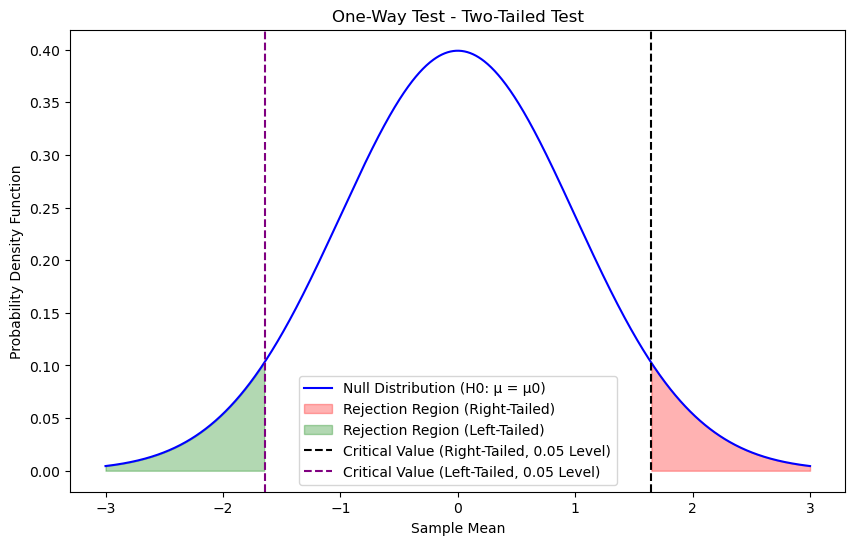

In [2]:
# Parameters
mu_0 = 0  # Null hypothesis mean
sigma = 1  # Standard deviation (assumed)
alpha = 0.05  # Significance level

# Generate data under the null hypothesis
null_distribution = norm(loc=mu_0, scale=sigma)
x_values = np.linspace(-3, 3, 1000)
y_values_null = null_distribution.pdf(x_values)

# Plot the null distribution
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_null, label='Null Distribution (H0: μ = μ0)', color='blue')

# Right-tailed test: Shade the rejection region
critical_value_right = null_distribution.ppf(1 - alpha)
plt.fill_between(x_values[x_values > critical_value_right], y_values_null[x_values > critical_value_right], color='red', alpha=0.3, label='Rejection Region (Right-Tailed)')

# Left-tailed test: Shade the rejection region
critical_value_left = null_distribution.ppf(alpha)
plt.fill_between(x_values[x_values < critical_value_left], y_values_null[x_values < critical_value_left], color='green', alpha=0.3, label='Rejection Region (Left-Tailed)')

# Add labels and legend
plt.title('One-Way Test - Two-Tailed Test')
plt.xlabel('Sample Mean')
plt.ylabel('Probability Density Function')
plt.axvline(critical_value_right, color='black', linestyle='--', label=f'Critical Value (Right-Tailed, {alpha} Level)')
plt.axvline(critical_value_left, color='purple', linestyle='--', label=f'Critical Value (Left-Tailed, {alpha} Level)')
plt.legend()

# Show the plot
plt.show()


In [3]:
data_path = f"./data/"

In [4]:
web_page_data = pd.read_csv(f'{data_path}web_page_data.csv')
four_session_data = pd.read_csv(f'{data_path}four_sessions.csv')
click_rates_data = pd.read_csv(f'{data_path}click_rates.csv')
ecom_data = pd.read_csv(f'{data_path}ab_data.csv')

print(f'Web page: {web_page_data.shape}, Four session: {four_session_data.shape}, click rates: {click_rates_data.shape}, imm data: {ecom_data.shape}')

Web page: (36, 2), Four session: (20, 2), click rates: (6, 3), imm data: (294480, 5)


In [5]:
web_page_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Page    36 non-null     object 
 1   Time    36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [6]:
click_rates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  6 non-null      object
 1   Click     6 non-null      object
 2   Rate      6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [7]:
four_session_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Page    20 non-null     object
 1   Time    20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


In [8]:
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294480 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [9]:
ecom_data["landing_page"].value_counts()

landing_page
new_page    147241
old_page    147239
Name: count, dtype: int64

In [10]:
web_page_data[web_page_data["Page"] == "Page B"]["Time"].mean()

1.62

In [11]:
diff = abs(web_page_data[web_page_data["Page"] == "Page B"]["Time"].mean() - web_page_data[web_page_data["Page"] == "Page A"]["Time"].mean())
print(f'The absolute difference in average time spent in PageA  and PageB:{diff}')

The absolute difference in average time spent in PageA  and PageB:0.3566666666666669


In [12]:
fig = px.box(web_page_data, x="Page", y="Time", title="Distribution of time spent in Pages", labels={'Time': 'Time spent (sec)', 'Page': 'Page'})
fig.show()

### Resampling (Cross validation and Bootsrap)

Resampling is a statistical technique that involves repeatedly drawing samples from the available data to perform statistical inference. It is commonly used when the data available is limited, and the goal is to make inferences about a population or to assess the variability of a statistical estimate.

Two common types of resampling techniques are:

1. **Bootstrapping:**
   - **Method:** Involves drawing random samples with replacement from the observed data.
   - **Purpose:** Used to estimate the sampling distribution of a statistic, such as the mean or standard deviation, by generating multiple bootstrap samples and computing the statistic of interest for each sample.
   - **Application:** Commonly used for constructing confidence intervals, assessing variability, and making statistical inferences.

2. **Cross-Validation:**
   - **Method:** Involves partitioning the data into training and testing sets multiple times.
   - **Purpose:** Used in machine learning to assess the performance of a predictive model by training and testing the model on different subsets of the data.
   - **Application:** Commonly used for model evaluation and selection, helping to avoid overfitting and providing a more robust assessment of a model's generalization performance.

Resampling techniques are valuable tools in statistics and machine learning as they provide a way to leverage available data more effectively, especially when data is limited or when the goal is to understand the variability and robustness of statistical estimates or machine learning models.


### Permutation test

A permutation test is a non-parametric statistical method that assesses the significance of a statistical hypothesis by repeatedly randomizing the assignment of observations to different groups, generating a distribution of the test statistic under the assumption of no effect, and comparing the observed statistic to this distribution to determine statistical significance.


In [13]:
def permute_function(df:pd.Series, n_a:int, n_b: int):
    combined = n_a + n_b
    # pick n_b idx with shuffle 
    idx_b = set(random.sample(range(combined), n_b))
    idx_a = set(range(combined)) - idx_b
    # compute and retrun the mean difference 
    return df.loc[list(idx_b)].mean() - df.loc[list(idx_a)].mean()

In [14]:
n_a = web_page_data[web_page_data["Page"] == "Page A"].shape[0]
n_b = web_page_data[web_page_data["Page"] == "Page B"].shape[0]

print(permute_function(web_page_data["Time"], n_a, n_b))

0.14866666666666672


In [15]:
random.seed(45)

# lets take 1000 samples 
permutation_diff = [permute_function(web_page_data["Time"], n_a, n_b) for _ in range(1000)]

fig = px.histogram(permutation_diff, nbins=12, labels={'value': 'session time difference (sec)'})

# Add a vertical line at difference
fig.add_trace(go.Scatter(x=[diff,diff], y=[0, len(permutation_diff)], mode='lines', name='Observed difference of mean',                         line=dict(color='red', width=2)))

fig.show()

According to the chart the observed difference between groups lies within the distribution of permuted differences. Hence, the test is not statistically significant and accept the null hypothesis. If the observed difference between groups lies outside the permuted difference distribution then the test is statistically significant and reject the null hypothesis.




### Statitical significance and P-values 

Statistical significance refers to the likelihood that observed differences or effects in data are not due to random chance but rather indicate a true underlying relationship or effect.

- **P-value**: Given a chance model that embodies the null hypothesis, the p-value is the probability of obtaining results as unusual or extreme as the observed results.
- **Alpha**: Alpha is the significance level, a predetermined threshold for the probability of making a Type I error (incorrectly rejecting a true null hypothesis).
- **Type I error (False Positive)**:  Occurs when the null hypothesis is incorrectly rejected when it is actually true.
- **Type II error (False Negative)**: Occurs when the null hypothesis is not rejected when there is a true effect or difference.



In [16]:
grouped_data = ecom_data.groupby("group")["converted"].value_counts()
grouped_data

group      converted
control    0            129479
           1             17723
treatment  0            129764
           1             17514
Name: count, dtype: int64

In [17]:
grouped_data.index

MultiIndex([(  'control', 0),
            (  'control', 1),
            ('treatment', 0),
            ('treatment', 1)],
           names=['group', 'converted'])

In [18]:
grouped_data["treatment"].sum()

147278

In [19]:
ecom_data['converted'].mean()


0.1196583808747623

In [20]:
obs_pct_diff = 100 * ( grouped_data.loc[('control', 1)] / grouped_data["control"].sum() - grouped_data.loc[('treatment', 1)] / grouped_data["treatment"].sum() )
print(f'1.  Observed difference: {obs_pct_diff:.4f}%')
zeros, ones = ecom_data['converted'].value_counts()
print(f'2. control pop: {grouped_data["control"].sum()}, treatment pop: {grouped_data["treatment"].sum()}')
print(f'3.  #0s: {zeros} %: {round(zeros/(ones +zeros), 3)}, #1s: {ones} %: {round(ones /(ones +zeros), 3)}')

1.  Observed difference: 0.1481%
2. control pop: 147202, treatment pop: 147278
3.  #0s: 259243 %: 0.88, #1s: 35237 %: 0.12


**Test**: How often was the difference >= 0.1481% (observed difference)? 

In [21]:
permutation_diff_conv = [100*permute_function(ecom_data["converted"], grouped_data.loc[('control', 1)], grouped_data.loc[('treatment', 1)]) for _ in range(1000)]

fig = px.histogram(permutation_diff_conv, nbins=12, labels={'value': 'Conversion rate (%)'}, title="Frequency distribution for the difference in conversion rates between control and treatment")

# Add a vertical line at difference
fig.add_trace(go.Scatter(x=[obs_pct_diff,obs_pct_diff], y=[0, len(permutation_diff_conv)/3], mode='lines', name='Observed difference', line=dict(color='red', width=2)))

fig.show()

In the graph, the observed difference of 0.368% is within the range of chance of variation, hence the test is not statistically significant. 

**P-Value**

An above graph is not accurate way to measure statistical significance, hence, the interest is the p-value. It is a frequency which the chance model produces a result more extreme than observed. 

Lets take average of all the values higher than observed values.

In [22]:
print(f'P-value: {np.mean([dif > obs_pct_diff for  dif in permutation_diff_conv])}')

P-value: 0.32


The p-value is 0.32, which means that we would expect to achieve a result as extreme as this, or more extreme, by random chance over 30% of the time. 

**The ASA statement stressed six principles for researchers and journal editors:**
- P-values can indicate how incompatible the data are with a specified statistical model.
- P-values do not measure the probability that the studied hypothesis is true, or the probability that the data were produced by random chance alone.
- Scientific conclusions and business or policy decisions should not be based only on whether a p-value passes a specific threshold.
- Proper inference requires full reporting and transparency.
- A p-value, or statistical significance, does not measure the size of an effect or the importance of a result.
- By itself, a p-value does not provide a good measure of evidence regarding a model or hypothesis.

In [23]:
cnv_rates = np.array([[grouped_data.loc[('control', 1)], grouped_data["control"].sum() - grouped_data.loc[('control', 1)]], [grouped_data.loc[('treatment', 1)], grouped_data["treatment"].sum() - grouped_data.loc[('treatment', 1)]]])
chi2, p_value, df, _ = stats.chi2_contingency(cnv_rates)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.1089


### t-Tests 

A t-test is a statistical test used to compare the means of two groups and determine if the observed differences between them are statistically significant. The test is based on the t-distribution and assesses whether the sample means are likely to have originated from populations with the same mean. There are different types of t-tests, including the independent samples t-test for comparing means of two independent groups and the paired samples t-test for comparing means of two related groups (paired observations). The t-test produces a p-value, and if this p-value is below a predetermined significance level (often 0.05), the null hypothesis of equal means is rejected in favor of the alternative hypothesis that the means are significantly different.

In [24]:
result = stats.ttest_ind(web_page_data[web_page_data["Page"] == 'Page A'].Time,  web_page_data[web_page_data["Page"] == 'Page B'].Time, equal_var=False)
print(f'p-value for single sided test: {result.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


In [25]:
tstat, p_val, _ = sm.stats.ttest_ind(web_page_data[web_page_data["Page"] == "Page A"]["Time"], web_page_data[web_page_data["Page"] == "Page B"]["Time"],  usevar='unequal', alternative='smaller')
print(f"tstat:{tstat}, p-value:{p_val}")

tstat:-1.0983155623638103, p-value:0.14076218622850328


###  Multiple testing

Multiple testing in data science refers to the practice of conducting multiple hypothesis tests simultaneously on a dataset. This could involve testing various hypotheses, comparing multiple groups, or examining different features in a dataset. The term "multiple testing" is often associated with the issue of inflated Type I error rates.

When conducting multiple tests without appropriate corrections, there is an increased risk of obtaining false positives (Type I errors). This is because, as more tests are performed, the likelihood of observing statistically significant results purely by chance increases. Some common scenarios where multiple testing arises include:

1. **Feature Selection in Machine Learning:**
   - When testing the significance of individual features or variables, especially in the context of model building.

2. **Comparing Multiple Groups:**
   - When comparing means or proportions across multiple groups, leading to multiple pairwise comparisons.

3. **Genomic Studies:**
   - In genetic research, where thousands of genes or variants may be tested simultaneously.

4. **A/B Testing:**
   - When evaluating multiple variations or versions of a product or strategy simultaneously.

To address the issue of multiple testing, various correction methods are employed, such as the Bonferroni correction, Holm's method, False Discovery Rate (FDR) control, and others. These methods adjust the significance threshold to control the overall Type I error rate or control the expected proportion of false positives.

It is essential to be mindful of multiple testing issues to maintain the integrity and reliability of statistical inferences in data science analyses. Ignoring these considerations can lead to an increased likelihood of making incorrect conclusions based on the observed data.

### Degree of freedom

In statistics, the degree of freedom (df) is a concept that refers to the number of values or quantities in the final calculation of a statistic that are free to vary. The concept is used in various statistical tests and distributions. The specific interpretation of degree of freedom depends on the context. Here are a few common uses:
$$ df = (r-1) \times (c-1)$$

where $r$ and $c$ are number of rows and column of the data.

1. **T-Distribution:**
   - In the context of the t-distribution, the degrees of freedom represent the number of independent observations in a sample. The t-distribution is used in hypothesis testing when the population standard deviation is unknown.

2. **Chi-Square Distribution:**
   - In the chi-square distribution, the degrees of freedom indicate the number of categories in a chi-square test that are free to vary. It is commonly used in tests of independence and goodness-of-fit.

3. **Regression Analysis:**
   - In linear regression, the degrees of freedom can represent the difference between the total number of observations and the number of parameters estimated in the model. For example, in simple linear regression, the degrees of freedom for residuals (error) would be n - 2, where n is the number of observations.

4. **ANOVA (Analysis of Variance):**
   - In analysis of variance, degrees of freedom are used to describe the number of groups and the number of observations in each group. They are used to calculate the F-statistic.

The concept of degrees of freedom is crucial in statistical inference because it helps determine the appropriate distributions and critical values for hypothesis testing and constructing confidence intervals. It essentially represents the amount of variability in a statistic that is not fixed by the data, allowing for a more accurate interpretation of the statistical results.


## ANOVA 

ANOVA, or Analysis of Variance, is a statistical method used to compare means across multiple groups to determine whether there are any statistically significant differences among them. ANOVA assesses whether the variability between group means is greater than the variability within the groups. It is a parametric test that assumes the data are normally distributed.

ANOVA is particularly useful when comparing means across three or more groups, as opposed to t-tests, which are designed for comparing two groups. ANOVA provides an overall test of equality of means, but it does not identify which specific groups differ from each other. If ANOVA indicates significant differences, post hoc tests (e.g., Tukey's HSD or Bonferroni correction) can be performed to identify the differing groups.

There are different types of ANOVA based on the study design:

1. **One-Way ANOVA:**
   - Used when comparing means across three or more independent groups. It tests whether there are any statistically significant differences among the group means.

2. **Two-Way ANOVA:**
   - Extends the analysis to two independent variables (factors). It assesses the impact of each variable on the dependent variable and whether there is an interaction effect between the variables.

3. **Repeated Measures ANOVA:**
   - Used when measurements are taken on the same subjects at multiple time points or under different conditions. It assesses whether there are significant differences over time or conditions.

The null hypothesis in ANOVA is that there are no significant differences among the group means. If the p-value is below a predetermined significance level (e.g., 0.05), the null hypothesis is rejected, suggesting that at least one group mean is significantly different from the others. ANOVA does not identify which specific groups differ; additional tests are needed for pairwise comparisons.


Notes:
- **F-statistics**: The F-statistic is a statistical measure used in the context of analysis of variance (ANOVA) and regression analysis. It assesses whether the variability in the means of different groups is larger than what would be expected by chance. 
   $$ F = \frac{Variance between groups}{Variance within groups}$$
   1. Variance Between Groups: Measures the variability in the means of different groups. A larger between-group variance suggests that there are significant differences in means.
   2. Variance Within Groups: Measures the variability within each group. It represents random variability or variability that is not due to systematic group differences.

   *In regression analysis, the F-statistic is also used to test the overall significance of the regression model. It compares the fit of the model with predictors to a null model with no predictors.*

- **Omnibus test**: The term "omnibus test" refers to a statistical test that provides a global assessment of the overall fit or equality of several groups or conditions in a dataset. Instead of testing specific pairwise differences between groups, an omnibus test evaluates the null hypothesis that all groups are equal or that a model fits the data equally well across groups.
- **Decomposition of Variance**:  The decomposition of variance, often referred to as the analysis of variance (ANOVA) decomposition, is a statistical technique used to partition the total variability observed in a set of data into different sources or components. This decomposition helps identify and quantify the relative contributions of various factors or sources of variation in a statistical model.

  The general idea is to understand how much of the total variability in the data can be attributed to different factors or sources. The total variance is decomposed into several components, typically including:

    1. **Between-Group Variance:**
       - This component represents the variability in the means of different groups or categories. In the context of ANOVA, it captures the extent to which group means differ from each other.

    2. **Within-Group Variance:**
       - Also known as residual or error variance, this component represents the variability within each group. It reflects the random variation that is not explained by the factors considered in the model.

    3. **Interaction Variance (if applicable):**
       - In some models, particularly in factorial designs, there might be interaction effects between factors. Interaction variance captures the variability associated with the combined effects of multiple factors.

  The decomposition is often visualized as a diagram or a table that shows the distribution of variance across different components. The goal is to understand which factors contribute significantly to the observed variability and which do not.

  The decomposition of variance is a fundamental concept in ANOVA and regression analysis. It helps to gain insights into the relative importance of different factors in explaining the variation in the data. Additionally, it provides a basis for hypothesis testing regarding the significance of specific effects or factors.

- **Sum of Sqaures**: The sum of squares (SS) is a measure of the total variability or dispersion in a set of data. It is calculated as the sum of the squared differences between each data point and the overall mean of the data. The concept of sum of squares is commonly used in the context of analysis of variance (ANOVA) and regression analysis.

In [26]:
four_session_data.head()

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172


In [27]:
fig = px.box(four_session_data, x="Page", y="Time", title="Distribution of time spent in Pages", labels={'Time': 'Time spent (sec)', 'Page': 'Page'})
fig.show()

compare each page with rest of the pages. For instance, Page 1 comapre to Page 2, Page 3, Page 4, and Page 2 compare with Page 3, and Page 4 etc.There is chances of being fooled by randomness during pairwise comparision. However, We can do single overall omnibus test to answer “Could all the pages have the same underlying stickiness, and the differences among them be due to the random way in which a common set of session times got allocated among the four pages?”. Lets use the permutation test for this ANOVA test.

In [28]:
ob_var = four_session_data.groupby("Page").mean().var()[0]
ob_mean = four_session_data.groupby("Page").mean().values.ravel()
print(f'Observed variance among groups: {ob_var}\nGroup Mean, Page 1:{ob_mean[0]}, Page 2: {ob_mean[1]}, Page 3: {ob_mean[2]}, Page 4: {ob_mean[3]}')

Observed variance among groups: 55.426666666666655
Group Mean, Page 1:172.8, Page 2: 182.6, Page 3: 175.6, Page 4: 164.6


Data Permutation (why)

Permuting the values in a permutation test serves the purpose of creating a null distribution under the assumption that there is no effect or difference between the groups. By randomly shuffling the observations among the different groups, you simulate a scenario where the group assignments have no impact on the observed values. This allows you to assess the variability in the test statistic (such as the F-statistic in ANOVA) that would occur by chance alone.

Rationale behind permuting values in a permutation test:

1. **Null Hypothesis (H₀):**
   - The null hypothesis in an ANOVA test assumes that there is no significant difference among the group means. Group assignments do not affect the observed values.

2. **Creating a Null Distribution:**
   - To simulate the null hypothesis, you permute (shuffle) the values among the different groups, effectively breaking any potential association between the group labels and the observed values.

3. **Calculation of Test Statistic:**
   - For each permutation, you calculate the test statistic of interest (e.g., F-statistic) on the permuted data.

4. **Comparison with Observed Statistic:**
   - The observed test statistic computed on the actual (non-permuted) data is then compared to the distribution of test statistics obtained from permutations.

5. **P-Value Calculation:**
   - The p-value is calculated as the proportion of permuted test statistics that are as extreme as or more extreme than the observed test statistic.

If the observed test statistic falls in the tail of the distribution of permuted statistics, it suggests that the observed data is unlikely to have occurred under the assumption of the null hypothesis. This leads to rejecting the null hypothesis in favor of the alternative, indicating that there is evidence of a significant difference among the group means.

Permutation tests are particularly useful when the assumptions of parametric tests (like traditional ANOVA) are not met, or when you want a non-parametric approach that doesn't rely on specific distributional assumptions. They provide a distribution-free way to assess the significance of observed differences.

In [29]:
def perm_test(df:pd.DataFrame):
    data = df.copy()
    data["Time"] = np.random.permutation(data["Time"].values)
    # compute and return variance of the mean of all group i.e. Pages 
    return data.groupby("Page").mean().var()[0]

In [30]:
perm_test(four_session_data)

62.573333333333345

In [31]:
random.seed(45)
permuted_vars = [perm_test(four_session_data) for _ in range(2500)]
pr_pb = np.mean([var > ob_var for var in permuted_vars])
print(f"Pr(Prob):{pr_pb}")

Pr(Prob):0.0808


In [32]:
fig = px.histogram(permuted_vars, nbins=12, labels={'value': 'Variance'}, title="Frequency distribution for Variance among the group")

# Add a vertical line at difference
fig.add_trace(go.Scatter(x=[ob_var,ob_var], y=[0, len(permuted_vars)/3], mode='lines', name='Observed difference', line=dict(color='red', width=2)))

fig.show()

F-statistics 

$$ F = \frac{Variance between groups}{Variance within groups}$$

In [33]:
anova_stats = stats.f_oneway(four_session_data[four_session_data.Page == 'Page 1'].Time, 
                            four_session_data[four_session_data.Page == 'Page 2'].Time,
                            four_session_data[four_session_data.Page == 'Page 3'].Time,
                            four_session_data[four_session_data.Page == 'Page 4'].Time)
print(f'F-stat: {anova_stats.statistic / 2:.3f}, p_value: {anova_stats.pvalue / 2:.3f}')

F-stat: 1.370, p_value: 0.039


### Chi-Squre Test 

The Chi-Square Test is a statistical test used to determine whether there is a significant association between categorical variables. It is often employed to analyze contingency tables, which display the frequency distribution of two or more categorical variables. The test assesses whether the observed distribution of frequencies in the table is significantly different from what would be expected under the assumption of independence between the variables.

The Chi-Square Test involves comparing the observed frequencies (counted in the data) with the expected frequencies (calculated based on the assumption of independence). The test statistic, chi-square ($X^2$), is calculated as the sum of the squared differences between observed and expected frequencies, normalized by the expected frequencies. The degrees of freedom in the test depend on the number of categories in the variables being analyzed.

The null hypothesis ($H_0$) for the Chi-Square Test asserts that there is no significant association between the variables, meaning they are independent. A rejection of the null hypothesis implies that there is evidence of a significant association.

The Chi-Square Test is commonly used in fields such as epidemiology, social sciences, and market research to investigate relationships between categorical variables, such as the relationship between smoking habits and the occurrence of a certain health condition.

In [34]:
click_rates_data.head()

,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12


In [35]:
clicks = click_rates_data.pivot(index="Click", columns="Headline", values="Rate")
clicks

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


Testing: 
Null Hpyothesis ($H_0$): All three headlies have same click

Lets compute the expected value. All Headlines have same click rate. 

In [36]:
row_avg = clicks.mean(axis=1)
expected = pd.DataFrame({"Headline A": row_avg, "Headline B": row_avg, "Headline C": row_avg})
expected

,Headline A,Headline B,Headline C
Click,,,
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


The Pearson residual:
$$ R = \frac{Observed - Expected}{\sqrt{Expected}} $$

The chi-squared statistics:
$$ \chi^2 = \sum_i^r \sum_j^c R^2$$

Where, $r$ and $C$ are the number of row, and number of columns.

In [37]:
def chi2(ob_data:list, exp_data:list):
    pearson_res = []
    for row, expect in zip(ob_data, exp_data):
        pearson_res.append([(ob - expect) ** 2 / expect for ob in row])
    # return sum of squared reiduals 
    return np.sum(pearson_res)

In [38]:
# compute permute_chi for each columns 
def permute_chi(df:pd.DataFrame, with_replacement: bool):
    if df.shape[0] > 2 : raise Exception("you have non-binary data for each column")
    ones, zeros = df.sum(axis=1)
    bag = np.hstack((np.ones(ones), np.zeros(zeros))).tolist()
    random.shuffle(bag)
    sample_clicks, sample_no_clikcs, init_r = [], [], 0
    for col in df.columns.tolist():
        if with_replacement: 
            category_clicks = sum(random.sample(bag, df[col].sum()))
        else:
            category_clicks = sum(bag[init_r: init_r + df[col].sum()])
        
        sample_clicks.append(category_clicks)
        sample_no_clikcs.append(df[col].sum() - category_clicks)
        
        init_r += df[col].sum()
    
    # H0 => expected (null hypothesis), for clicked vs non-clicked 
    expected_clicks, expected_no_clicks = expected.sum(axis=1).tolist()
    # print(f"permuted data: {[sample_clicks, sample_no_clikcs], [expected_clicks/expected.shape[1], expected_no_clicks/expected.shape[1] ]}")
    return chi2([sample_clicks, sample_no_clikcs], [expected_clicks/expected.shape[1], expected_no_clicks/expected.shape[1] ] )

In [39]:
permute_chi(clicks, False)

0.2379913529808417

In [40]:
ob_chisquared = chi2(clicks.values, expected["Headline A"].tolist())
print(f"observed chi: {ob_chisquared}")

observed chi: 1.6659394708658917


In [41]:
permuted_chi_data = [permute_chi(clicks, False) for _ in range(2500)]
resampled_pval = np.mean([chi_val > ob_chisquared for chi_val in permuted_chi_data])
print(f"Random sample p-value: {resampled_pval}")

Random sample p-value: 0.4616


In [42]:
permuted_chi_data_ = [permute_chi(clicks, True) for _ in range(2500)]
resampled_pval_ = np.mean([chi_val > ob_chisquared for chi_val in permuted_chi_data_])
print(f"Random sample with replacement p-value: {resampled_pval_}")

Random sample with replacement p-value: 0.4692


In [43]:
fig = px.histogram(permuted_chi_data, nbins=12, labels={'value': 'Chi-square score'}, title="Chi-Square score Frequency distribution for click rate among different Headlines for 2500 trials")

# Add a vertical line at difference
fig.add_trace(go.Scatter(x=[ob_chisquared,ob_chisquared], y=[0, len(permuted_chi_data)/3], mode='lines', name='Observed difference', line=dict(color='red', width=2)))

fig.show()

According to the plot, the click rate among Four headlines are equally distributed. We do not reject the null hypothesis.

In [44]:
# Degrees of freedom
df_values = [1, 2, 5, 10, 20]

# Create figure
fig = go.Figure()

# Plot Chi-Square distributions for different degrees of freedom
for df in df_values:
    x =  np.array([1 + i * (30 - 1) / 99 for i in range(100)])
    y = np.random.chisquare(df, size=100)
    histogram, bin_edges = np.histogram(y, bins=50, density=True)
    fig.add_trace(go.Scatter(x=x, y=np.sqrt(x) * np.exp(-x / 2) / (2 ** (df / 2 - 1) * np.math.gamma(df / 2)), mode='lines', name=f'DF = {df}'))
    fig.add_trace(go.Histogram(x=y, nbinsx=50, name=f'DF = {df}', opacity=0.5))

# Update layout
fig.update_layout(
    title='Chi-Square Distribution with Different Degrees of Freedom',
    xaxis_title='Value',
    yaxis_title='Probability Density',
    showlegend=True
)

# Show the plot
fig.show()


### Fisher's Exact Test 

It is a statistical test used to determine if there are nonrandom associations between two categorical variables in a 2x2 contingency table. It is particularly useful when the sample size is small, and the usual chi-square test may not be appropriate.

In [45]:
im_data = pd.read_csv(f"{data_path}imanishi_data.csv")
im_data

,Digit,Frequency
0,0,14
1,1,71
2,2,7
3,3,65
4,4,23
5,5,19
6,6,12
7,7,45
8,8,53
9,9,6


In [55]:

fig = go.Figure()

fig.add_trace(go.Bar(x=im_data['Digit'], y=im_data['Frequency  ']))

fig.update_layout(title='Bar Chart for Digits with Frequencies',
                  xaxis=dict(title='Digit'),
                  yaxis=dict(title='Frequency'))

fig.show()

### Statistical power

Statistical power, often denoted as $(1 - \beta)$, $\beta$ or Type II error, is a concept in statistics that represents the probability of correctly rejecting a null hypothesis when it is false. In other words, it is the probability of detecting a true effect or difference if it exists.

Here are the key components of statistical power:

1. **Null Hypothesis ($H_0$):** The hypothesis that there is no real effect, no difference, or no relationship in the population.

2. **Alternative Hypothesis ($H_1$ or $H_a$):** The hypothesis that there is a real effect, difference, or relationship in the population.

3. **Type I Error ($\alpha$):** The probability of rejecting a true null hypothesis. It is also known as the significance level and is typically set at 0.05.

4. **Type II Error ($\beta$):** The probability of failing to reject a false null hypothesis. It is the complement of statistical power ($1 - \beta$).

5. **Effect Size:** The magnitude of the true effect or difference in the population. Larger effect sizes generally lead to higher power.

6. **Sample Size:** The number of observations or data points in the sample. Larger sample sizes generally lead to higher power.

The relationship between these components can be summarized as follows:

 $$ Power = 1 - \beta = 1 - P(\text{Type II Error}) $$

Statistical power is crucial in experimental design and hypothesis testing. A study with high statistical power is more likely to detect true effects, providing confidence in the results. Researchers often perform power analyses during the planning phase of a study to determine an appropriate sample size that ensures a high probability of detecting meaningful effects if they exist.

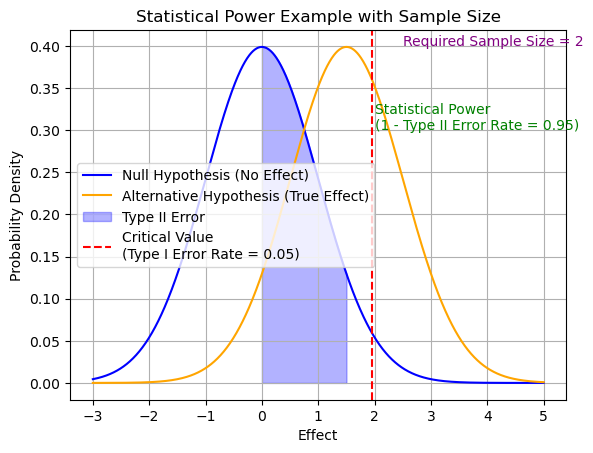

In [72]:
# Parameters for the null hypothesis distribution (no effect)
mu_0 = 0  # mean under null hypothesis
sigma = 1  # standard deviation

# Parameters for the alternative hypothesis distribution (true effect)
mu_1 = 1.5  # mean under alternative hypothesis

# Significance level (Type I error rate)
alpha = 0.05

# Critical value for a two-tailed test
z_critical = norm.ppf(1 - alpha / 2)

# Effect size (difference in means)
effect_size = mu_1 - mu_0

# Desired power
desired_power = 0.80

# Calculate required sample size for desired power
sample_size = norm.ppf(desired_power, loc=mu_1, scale=sigma) ** 2 / effect_size ** 2

# Calculate power with the required sample size
power = 1 - norm.cdf(z_critical - effect_size, loc=mu_1, scale=sigma / np.sqrt(sample_size))

# Plot the distributions under null and alternative hypotheses
x = np.linspace(-3, 5, 1000)
plt.plot(x, norm.pdf(x, loc=mu_0, scale=sigma), label='Null Hypothesis (No Effect)', color='blue')
plt.plot(x, norm.pdf(x, loc=mu_1, scale=sigma), label='Alternative Hypothesis (True Effect)', color='orange')

# Shade the area representing Type II error (not rejecting a false null hypothesis)
x_fill = np.linspace(mu_0, mu_0 + effect_size, 1000)
plt.fill_between(x_fill, norm.pdf(x_fill, loc=mu_0, scale=sigma), color='blue', alpha=0.3, label='Type II Error')

# Mark the critical value for Type I error
plt.axvline(x=z_critical, color='red', linestyle='--', label=f'Critical Value\n(Type I Error Rate = {alpha})')

# Mark the region of statistical power
plt.text(mu_1 + 0.5, 0.3, f'Statistical Power\n(1 - Type II Error Rate = {power:.2f})', color='green')

# Display the required sample size
plt.text(mu_1 +1, 0.4, f'Required Sample Size = {int(sample_size)}', color='purple')

# Customize the plot
plt.title('Statistical Power Example with Sample Size')
plt.xlabel('Effect')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


This plot illustrates the null hypothesis distribution (blue) and the alternative hypothesis distribution (orange). The shaded area represents the Type II error, which occurs when we fail to reject the null hypothesis despite there being a true effect. The critical value for Type I error $(\alpha)$ is marked with a red dashed line. The area to the right of this critical value represents the rejection region for the null hypothesis.

The goal is to maximize the area under the orange curve (alternative hypothesis) in the rejection region, indicating higher statistical power. A larger effect size or a larger sample size can increase statistical power.

In this example, the required sample size is calculated to achieve a desired power of 0.80. 

### Multi-Arm Bandit 
A multi-arm bandit is a type of problem or framework in decision-making and optimization where an agent must allocate resources (such as time, money, or opportunities) among several options or "arms" to maximize cumulative reward over time. The term "bandit" is derived from the idea of a row of slot machines (one-armed bandits) in a casino, where the agent must decide which machine to pull to maximize overall winnings.

Key characteristics of a multi-arm bandit problem include:

1. **Arms:** The available options or actions that the agent can choose from. Each arm is associated with an unknown reward distribution.

2. **Reward Distributions:** Each arm has an underlying probability distribution that governs the rewards it can generate. The agent does not initially know these distributions but learns them through exploration.

3. **Exploration-Exploitation Dilemma:** The agent faces a trade-off between exploring new arms to discover their potential rewards and exploiting known arms to maximize immediate rewards.

4. **Regret:** The difference between the cumulative reward obtained by the agent and the maximum cumulative reward that could have been obtained by always choosing the best arm. Minimizing regret is a common objective in multi-arm bandit problems.

5. **Adaptability:** The agent should adapt its strategy over time based on the information gained from previous actions.

Multi-arm bandit problems find applications in various fields, such as:

- **Online advertising:** Deciding which ad to display to maximize click-through rates.
- **Clinical trials:** Allocating patients to different treatments to maximize the discovery of effective treatments.
- **Internet of Things (IoT):** Allocating resources among different sensors or devices for optimal monitoring.
- **Algorithmic trading:** Choosing investment strategies to maximize returns.

Different algorithms, such as epsilon-greedy, UCB (Upper Confidence Bound), and Thompson Sampling, are used to address the exploration-exploitation trade-off and solve multi-arm bandit problems. These algorithms aim to balance the need for exploration to gather information and exploitation to maximize rewards.


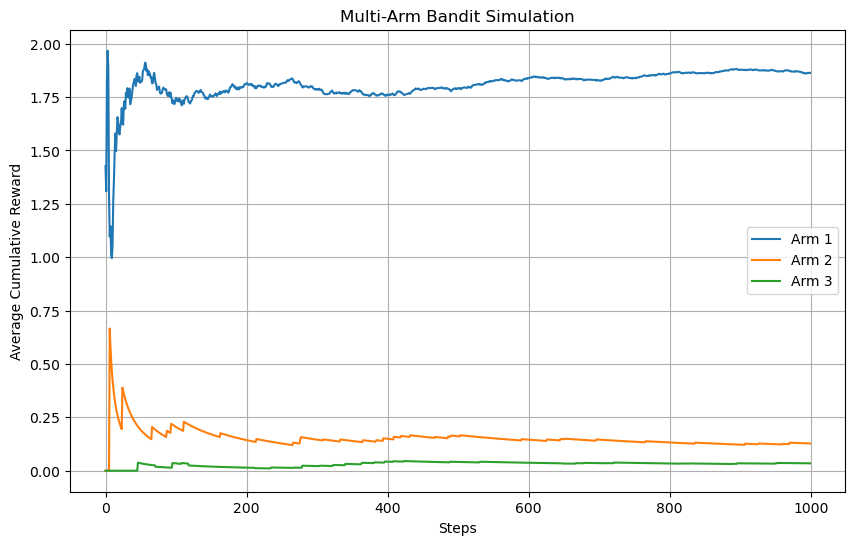

In [73]:
# Define parameters
num_arms = 3
num_steps = 1000

# True mean rewards for each arm (unknown to the agent)
true_means = [2, 4, 1]

# Initialize variables
cumulative_rewards = np.zeros((num_arms, num_steps))
chosen_arms = np.zeros(num_steps, dtype=int)

# Agent's strategy: Epsilon-Greedy
epsilon = 0.1

# Simulation loop
for step in range(num_steps):
    # Explore (with probability epsilon)
    if np.random.rand() < epsilon:
        chosen_arm = np.random.choice(num_arms)
    # Exploit (with probability 1-epsilon)
    else:
        chosen_arm = np.argmax(np.mean(cumulative_rewards, axis=1))

    # Simulate pulling the chosen arm and observe the reward
    reward = np.random.normal(true_means[chosen_arm], 1)
    
    # Update cumulative rewards and record chosen arm
    cumulative_rewards[chosen_arm, step] = reward
    chosen_arms[step] = chosen_arm

# Plot the results
plt.figure(figsize=(10, 6))

# Plot cumulative rewards over time
for arm in range(num_arms):
    plt.plot(np.cumsum(cumulative_rewards[arm]) / np.arange(1, num_steps + 1), label=f'Arm {arm + 1}')

plt.title('Multi-Arm Bandit Simulation')
plt.xlabel('Steps')
plt.ylabel('Average Cumulative Reward')
plt.legend()
plt.grid(True)
plt.show()


In this simulation, the epsilon-greedy strategy is used, where the agent explores with a probability of $\epsilon$ and exploits the best-known option with a probability of $1 - \epsilon$. The plot shows the average cumulative rewards for each arm over time. The agent learns to prefer the arm with the highest true mean reward as it explores and exploits the arms.